<a href="https://colab.research.google.com/github/skywalker0803r/python-tutoring-materials/blob/main/%E8%AA%B2%E7%A8%8B/302_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 302 Classification

View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
* torch: 0.1.11
* matplotlib

# 載入函示庫

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)    # reproducible

# 創建假訓練資料

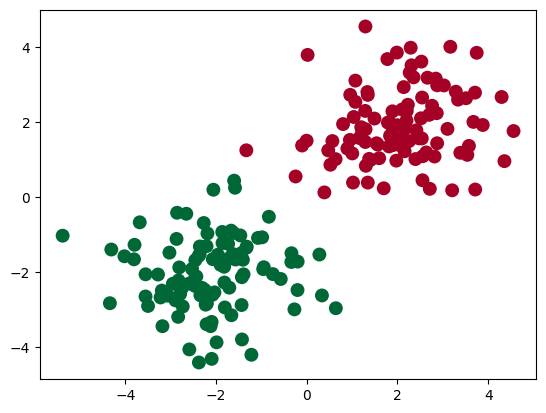

In [2]:
# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

# 建立 分類神經網路

In [11]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # n_feature:2, n_hidden:10
        self.out = torch.nn.Linear(n_hidden, n_output)   # n_hidden:10, n_output:2

    def forward(self, x):
        x = F.relu(self.hidden(x))      # 在隱藏層(hidden)後面接一層relu
        #x = F.softmax(self.out(x)) # 有些做法會在這裡接softmax
        x = self.out(x) # 也可以不接,在後面算Loss才接softmax
        return x

In [12]:
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [22]:
# 代表機率高低
out = net(x)[0:3]
out

tensor([[-0.0288,  0.1002],
        [-0.0757,  0.0714],
        [-0.2712,  0.1690]], grad_fn=<SliceBackward0>)

In [23]:
out = F.softmax(out)
out

<ipython-input-23-feea27d82209>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(out)


tensor([[0.4678, 0.5322],
        [0.4633, 0.5367],
        [0.3917, 0.6083]], grad_fn=<SoftmaxBackward0>)

In [24]:
torch.max(out, 1) #取得softmax的輸出再做torch.max運算

torch.return_types.max(
values=tensor([0.5322, 0.5367, 0.6083], grad_fn=<MaxBackward0>),
indices=tensor([1, 1, 1]))

In [16]:
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
optimizer = torch.optim.SGD(net.parameters(), lr=0.02) # 跟301_regression(回歸算法一樣,SGD優化器)
loss_func = torch.nn.CrossEntropyLoss()  # Loss function(損失函數),CrossEntropyLoss通常用來做分類任務使用

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [17]:
plt.ion()   # something about plotting

<ipython-input-25-b959fdfa0c6c>:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  _, prediction = torch.max(F.softmax(out), 1)


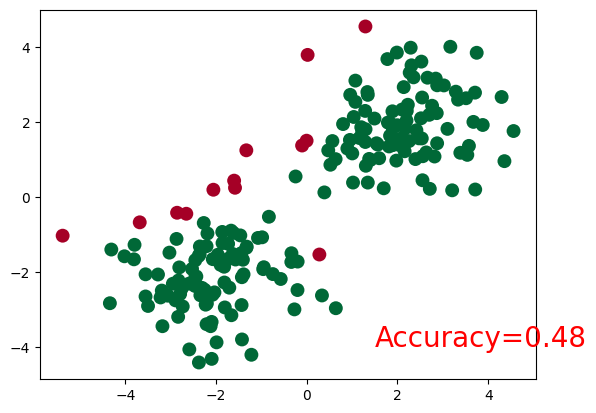

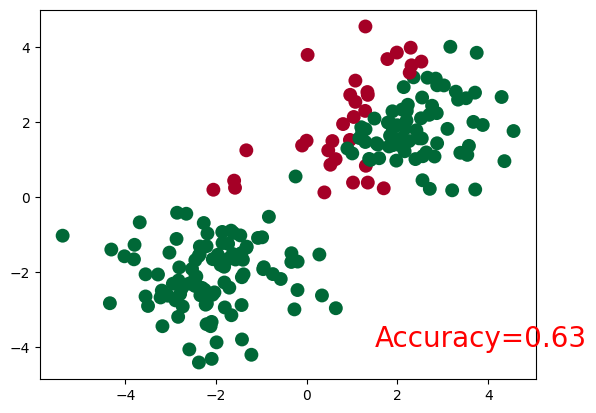

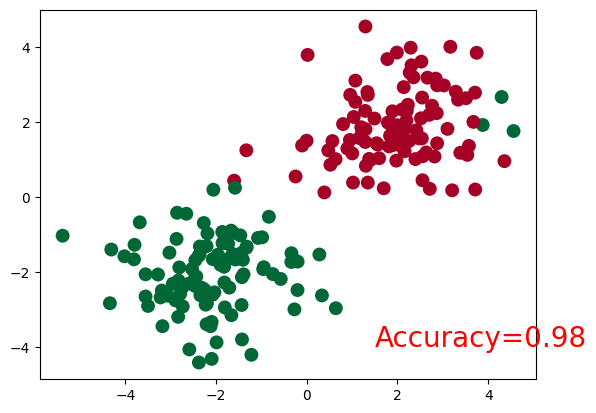

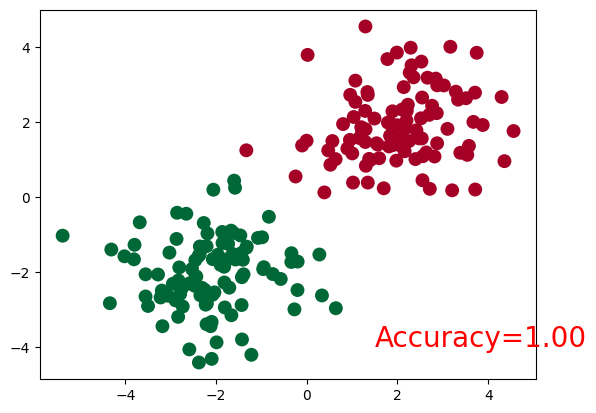

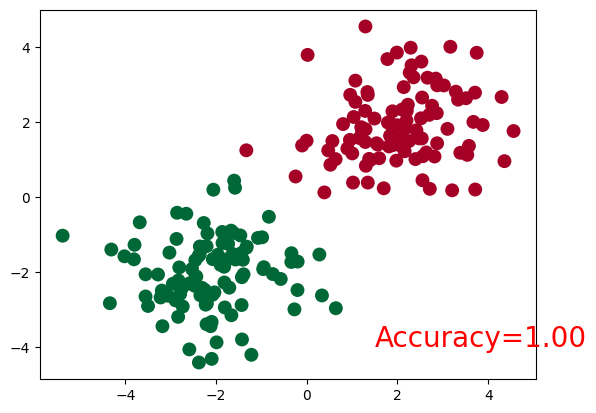

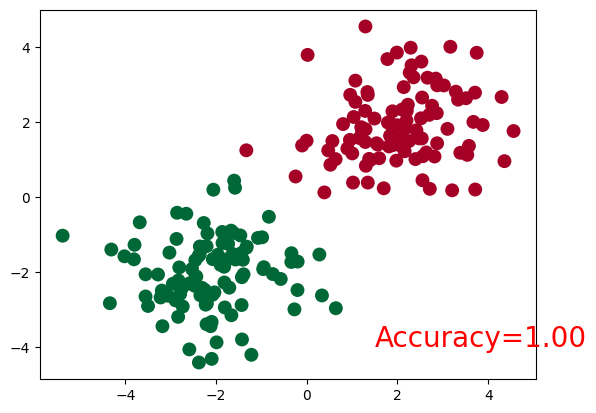

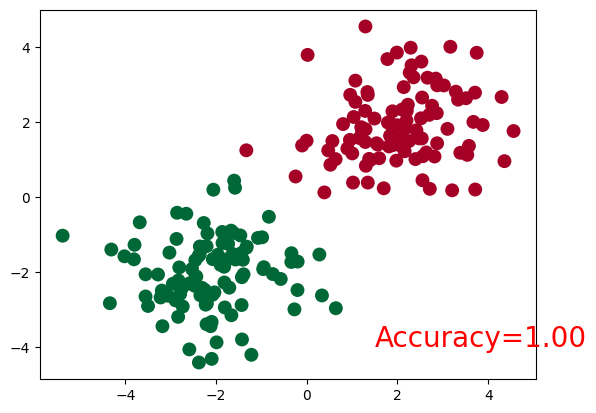

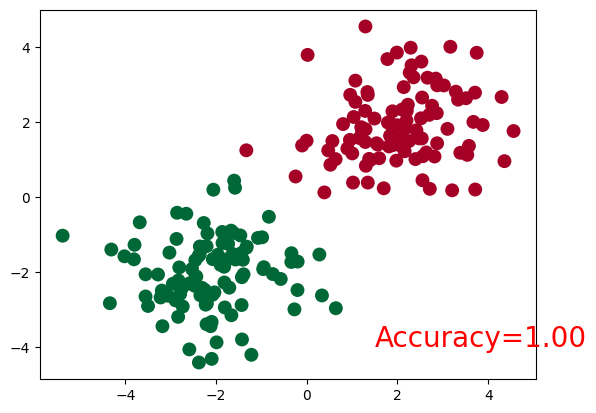

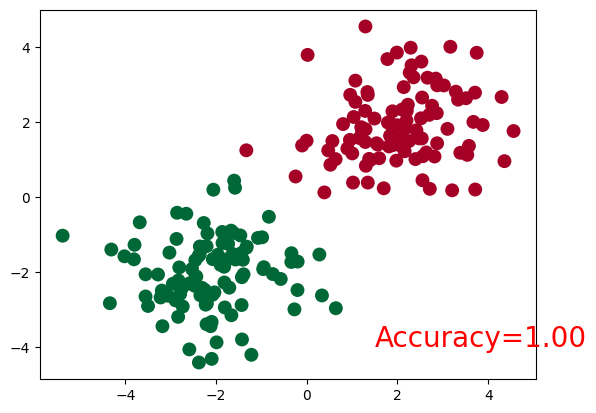

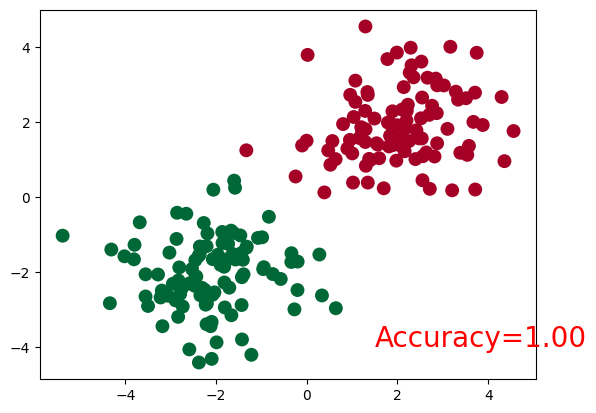

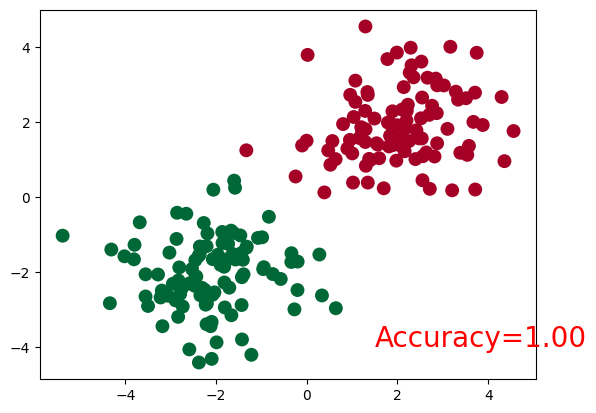

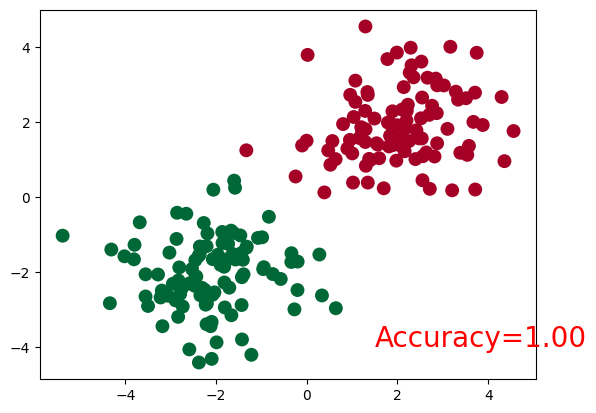

In [25]:
for t in range(100):
    out = net(x)  # 前向傳播
    loss = loss_func(out, y) # 計算Loss(利用CrossEntropyLoss損失函數),根據預測值(out)和答案(y)
    
    # 更新pytorch神經網路模型 必備三步驟
    optimizer.zero_grad()# 梯度清零
    loss.backward()# 反向傳播計算梯度
    optimizer.step()# 利用梯度更新模型權重
    
    # 每迭代10次 or(或者) 迭代次數為[3跟6]的時候 繪圖!
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.cla() # 畫布清空
        #取得softmax的輸出再做torch.max運算(輸出機率大的輸出機率大的indices)
        _, prediction = torch.max(F.softmax(out), 1) 
        # 轉換成numpy array的格式
        pred_y = prediction.data.numpy().squeeze()
        # 答案的y也轉換成numpy array的格式
        target_y = y.data.numpy()
        # 繪製scatter 散點圖
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        # 準確度(accuracy)
        accuracy = sum(pred_y == target_y)/200.
        # 把準確度資訊利用plt.text功能"寫"在畫布上
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()